# 1 - Perkenalan 

Nama        : Ucik Refani Kurnia Sari

Batch       : FTDS R-016

Objective   : Memprediksi customer Churn atau not Churn dengan menggunakan Artificial Neural Network (ANN).

# Latar Belakang

Customer Churn adalah kehilangan pelanggan dari suatu bisnis. Churn sendiri dihitung dari berapa banyak pelanggan meninggalkan bisnis Telco dalam waktu tertentu. jika variabel target 'Churn', maka pelanggan sudah tidak lagi berlangganan layanan perusahaan Telco.
Customer Churn penting untuk diketahui bisnis karena merupakan gambaran kesuksesan suatu bisnis dalam mempertahankan pelanggan.

# Problem Statement

1. Apakah pelanggan yang pergi lebih banyak daripada yang bertahan?
2. Metode apa yang lebih disukai pelanggan untuk melakukan pembayaran?
3. Berdasarkan gender, pelanggan mana yang lebih banyak melakukan Churn?
4. Berdasarkan partner, pelanggan mana yang lebih banyak melakukan Churn?
5. Berdasarkan phone service, pelanggan mana yang lebih banyak melakukan Churn?
6. Berdasarkan SeniorCitizen, pelanggan mana yang lebih banyak melakukan Churn?
7. Berdasarkan Dependents, pelanggan mana yang lebih banyak melakukan Churn?
8. Berdasarkan MultipleLines, pelanggan mana yang lebih banyak melakukan Churn?
9. Lebih banyak mana tenure pelanggan yang bertahan atau pelanggan yang pergi?


# 2 - Import Libraries

In [100]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model
from keras.layers import Dropout
from sklearn.metrics import classification_report
import joblib
from tensorflow.keras.models import load_model

# 3 - Data Loading 

In [2]:
#Load data
data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
#Display the top 5 rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Display the bottom 5 rows
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
#See number of rows and columns
data.shape

(7043, 21)

dataframe terdiri dari 7043 baris dan 21 kolom

In [6]:
#Checking the datatype of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- tidak terdapat missing value pada setiap kolom
- data terdiri dari integer, object, dan float. 
- beberapa fitur seharusnya numerik, bukan obyek, misal TotalCharges

In [7]:
#Change totalcharges to numeric
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


kolom total charges sudah berubah dari object ke float

In [9]:
#Rename Columns 
data.rename(columns={'PaymentMethod' : 'Payment'}, inplace=True)

In [10]:
#Delete Columns 
data = data.drop('customerID', axis=1)

# 4 - Exploratory Data Analysis (EDA)

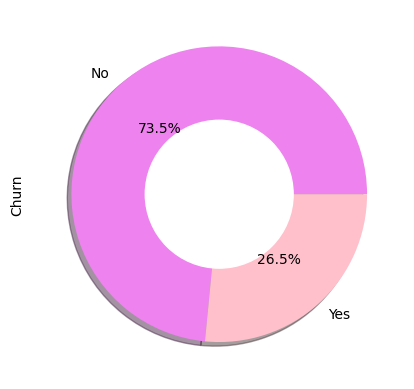

In [11]:
#Create pie chart
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = ['violet', 'pink'])
#Plotting the donut chart
my_circle = plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

jumlah pelanggan yang bertahan lebih banyak daripada pelanggan yang pergi dari Telco. Pelanggan yang melakukan 'Churn' sekitar 26.5%. 

<AxesSubplot: title={'center': 'Payment of Customer'}, xlabel='Payment', ylabel='count'>

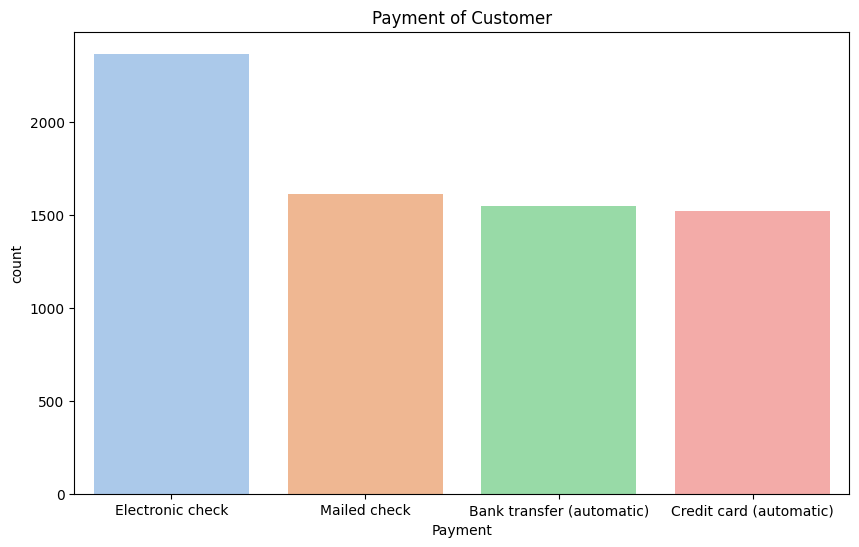

In [12]:
plt.figure(figsize=(10,6))
plt.title ('Payment of Customer')
sns.countplot( x= 'Payment', palette= 'pastel', data=data)


pelanggan lebih suka melakukan pembayaran dengan menggunakan metode Elektronic check, kemudian yang paling jarang digunakan adalah metode credit card(automatic). 

In [13]:
# Categorical data
data.describe(include = "O").T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [14]:
#Numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


 untuk ke 3 kolom tersebut juga standar deviasi lebih kecil dari mean yang berarti bahwa data bersifat homogen, atau rentang variasi data kecil.  
kemudian untuk nilai SeniorCitizen hanya berupa 0 dan 1. 

<AxesSubplot: xlabel='MultipleLines', ylabel='count'>

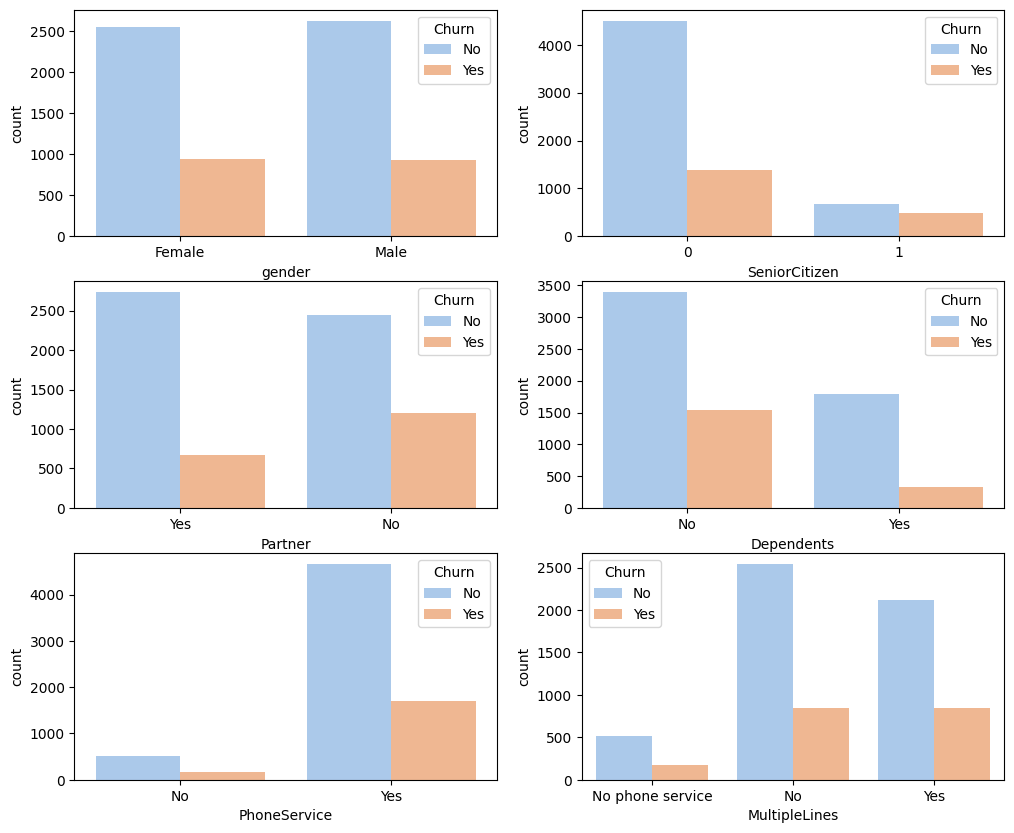

In [15]:
plt.figure(figsize = (12,10))

plt.subplot(3,2,1)
sns.countplot(x = 'gender', hue = 'Churn', palette = 'pastel', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', palette = 'pastel', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'Partner', hue = 'Churn', palette = 'pastel', data = data)

plt.subplot(3,2,4)
sns.countplot(x = 'Dependents', hue = 'Churn', palette = 'pastel', data = data)

plt.subplot(3,2,5)
sns.countplot(x = 'PhoneService', hue = 'Churn', palette = 'pastel', data = data)

plt.subplot(3,2,6)
sns.countplot(x = 'MultipleLines', hue = 'Churn', palette = 'pastel', data = data)

- Berdasarkan gender, pelanggan yang pergi lebih banyak perempuan, dan pelanggan yang bertahan lebih banyak laki-laki. 
- pelanggan yang merupakan warga senior, lebih sedikit pelanggan yang pergi. 
- pelanggan yang memiliki pasangan, lebih cenderung bertahan daripada yang tidak memiliki pasangan. 
- jumlah pelanggan yang memiliki tanggungan lebih sedikit daripada yang tidak memiliki tanggungan, kemudian pelanggan yang pergi lebih banyak dari pelanggan yang tidak memiliki tanggungan. 
- pelanggan mayoritas memiliki layanan telepon, dan kemungkinan pelanggan yang pergi lebih banyak yang memiliki layanan telepon.
- pelanggan yang memiliki banyak saluran lebih sedikit daripada pelanggan yang tidak memiliki banyak saluran, namun masih ada yang tidak memiliki layanan telepon. pelanggan yang pergi lebih banyak dari pelanggan yang memiliki banyak saluran. 

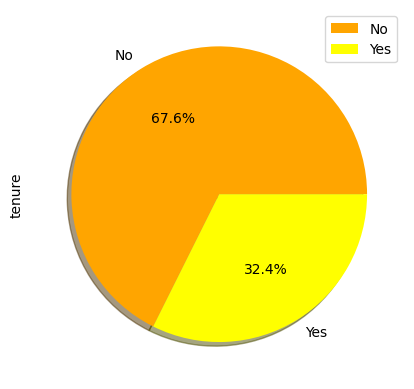

In [16]:
#Create pie chart
data.groupby(['Churn']).mean().plot(kind='pie', y= 'tenure', autopct='%1.1f%%', shadow=True, colors = ['orange', 'yellow'])
plt.show()

Tenure yang dimiliki pelanggan yang bertahan lebih banyak daripada tenure yang dimiliki pelanggan yang pergi. 

In [17]:
unique_values = {column: list(data[column].unique()) 
for column in data.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

gender : ['Female', 'Male']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']
PhoneService : ['No', 'Yes']
MultipleLines : ['No phone service', 'No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
OnlineSecurity : ['No', 'Yes', 'No internet service']
OnlineBackup : ['Yes', 'No', 'No internet service']
DeviceProtection : ['No', 'Yes', 'No internet service']
TechSupport : ['No', 'Yes', 'No internet service']
StreamingTV : ['No', 'Yes', 'No internet service']
StreamingMovies : ['No', 'Yes', 'No internet service']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
Payment : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']


ada beberapa fitur di dalam dataset, misalnya 'DeviceProtection' yang memiliki nilai 'No' dan 'No internet service'. karena keduanya pada dasarnya adalah sama, sehingga perlu diubah menjadi 1 index. 

In [18]:
#Replace index
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')

data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']] = data[['OnlineSecurity', 'OnlineBackup', 
                                                                'DeviceProtection', 'TechSupport', 
                                                                'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [19]:
#Check again 
unique_values = {column: list(data[column].unique()) 
for column in data.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

gender : ['Female', 'Male']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']
PhoneService : ['No', 'Yes']
MultipleLines : ['No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
OnlineSecurity : ['No', 'Yes']
OnlineBackup : ['Yes', 'No']
DeviceProtection : ['No', 'Yes']
TechSupport : ['No', 'Yes']
StreamingTV : ['No', 'Yes']
StreamingMovies : ['No', 'Yes']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
Payment : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']


In [20]:
#Replace yes and no to 1 and 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    data[col] = data[col].replace({'Yes': 1,'No': 0})
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Payment,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [21]:
#Replace female and male to 1 and 0
data['gender'].replace({'Female':1,'Male':0},inplace=True)

In [22]:
data['tenure'].value_counts(ascending= False)

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [23]:
data['tenure']  = data['tenure'].replace(0, np.NaN)
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

Skew : 0.24


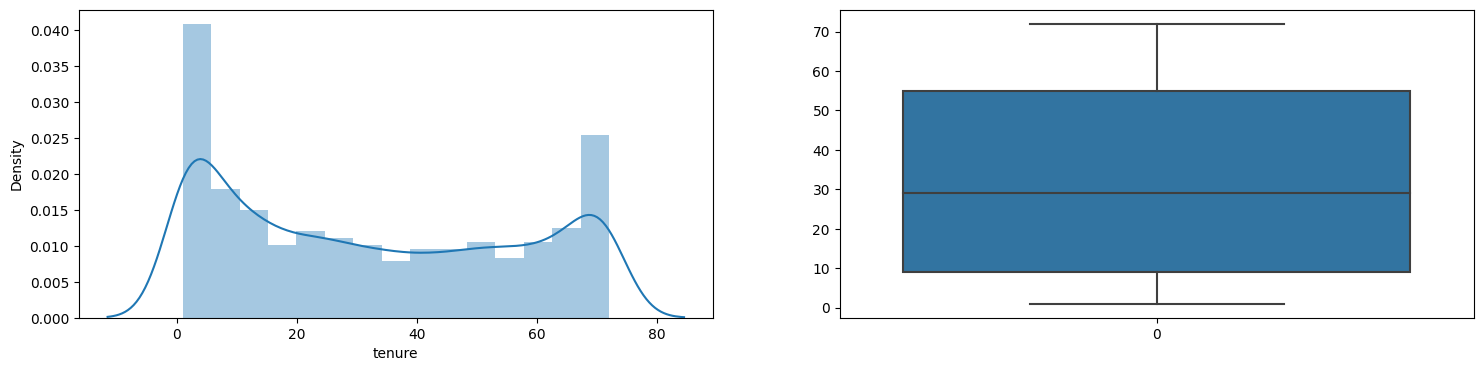

In [24]:
#Tenure distribution
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
print('Skew :',round(data.tenure.skew(),2))
sns.distplot(data.tenure, ax=ax[0])
sns.boxplot(data.tenure, ax=ax[1])
plt.show()

Skew : -0.22


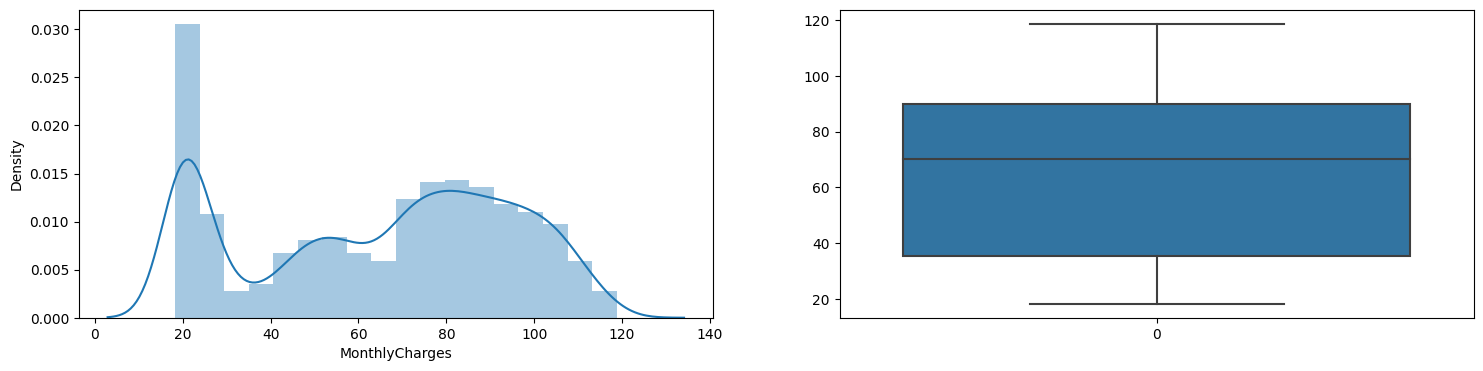

In [25]:
#MonthlyCharges distribution
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
print('Skew :',round(data.MonthlyCharges.skew(),2))
sns.distplot(data.MonthlyCharges, ax=ax[0])
sns.boxplot(data.MonthlyCharges, ax=ax[1])
plt.show()

Skew : 0.96


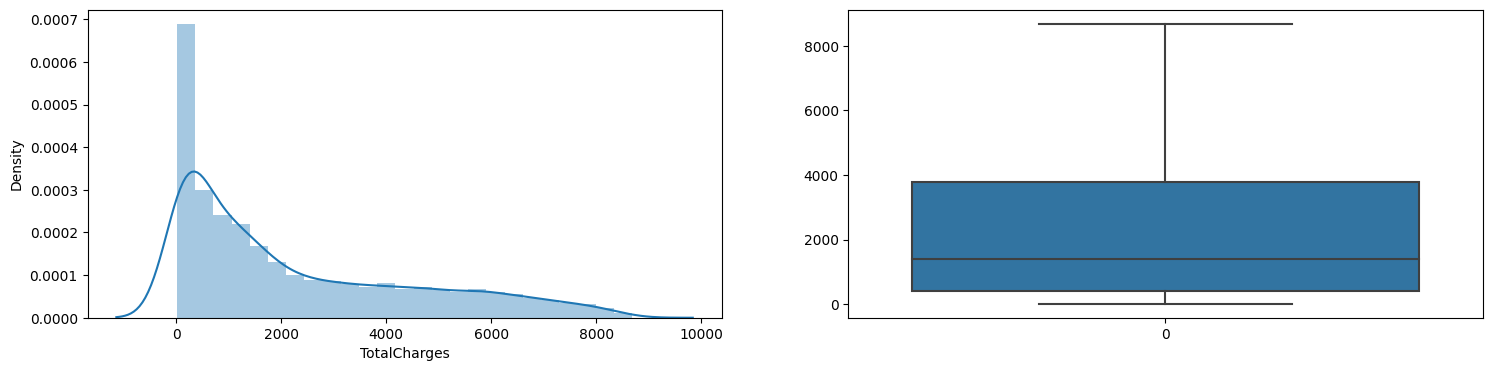

In [26]:
#TotalCharges distribution
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
print('Skew :',round(data.TotalCharges.skew(),2))
sns.distplot(data.TotalCharges, ax=ax[0])
sns.boxplot(data.TotalCharges, ax=ax[1])
plt.show()

berdasarkan 3 kolom diatas, kolom Total Charges terdistribusi tidak normal atau skewed. kolom tenure dan Montly Charges terdistribusi normal. 
tidak terdapat outlier pada kolom numerical.


# 5 - Data Preprocessing

<AxesSubplot: >

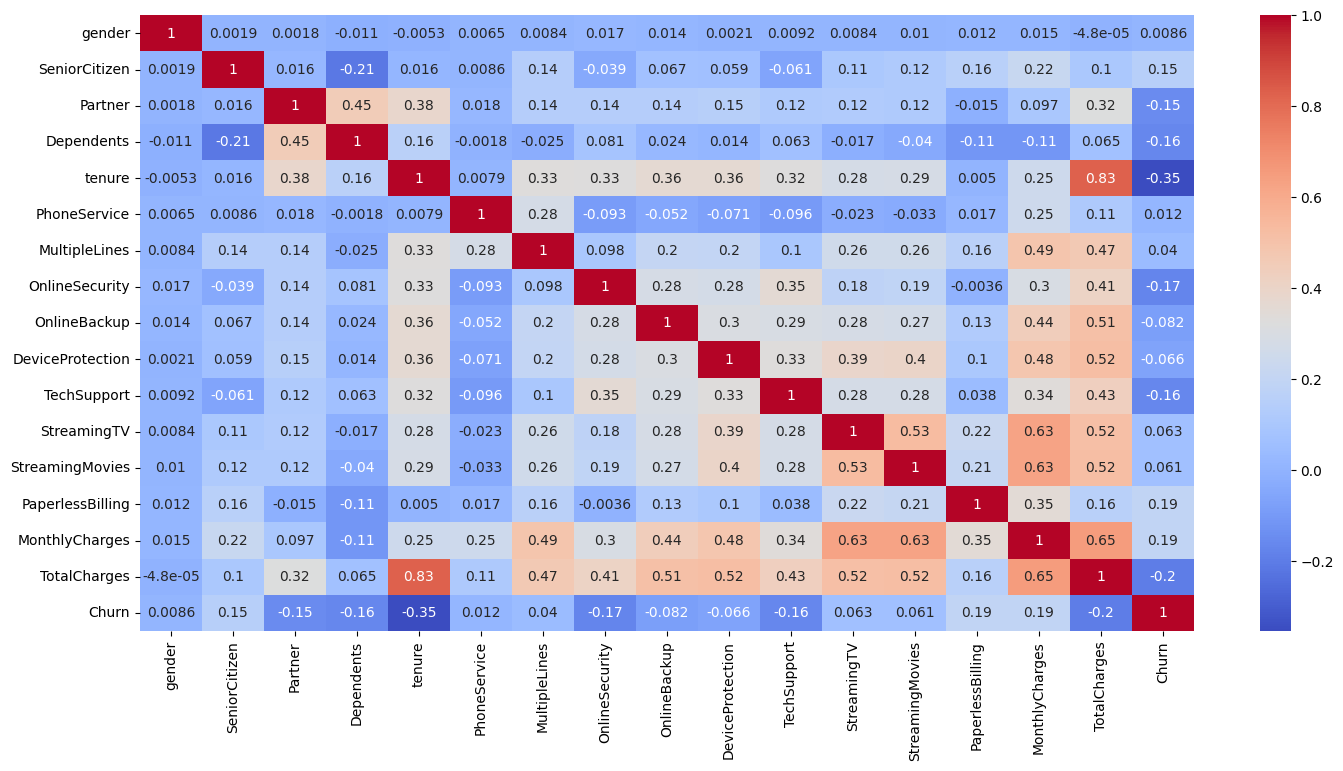

In [27]:
plt.figure(figsize=(17,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

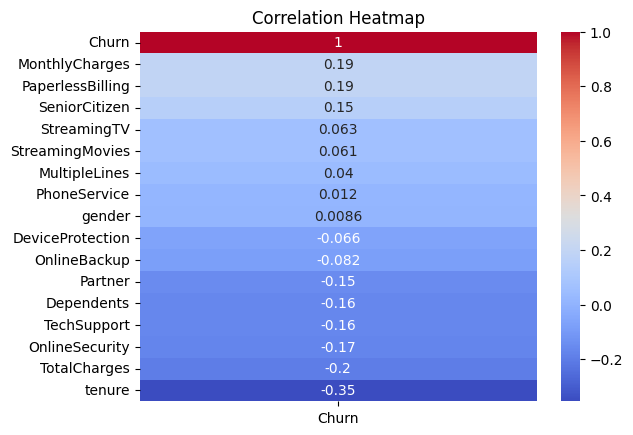

In [28]:
sns.heatmap(data.corr()[['Churn']].sort_values(by='Churn', ascending=False), annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

menghapus kolom onlinebackup, partner, dependents, techsupport, dan onlinesecurity karena tidak memiliki korelasi yang kuat. 

In [29]:
#Get data for model inference
data_inf = data.sample (10, random_state = 24)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Payment,MonthlyCharges,TotalCharges,Churn
261,0,1,0,0,13.0,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,106.90,1364.30,1
490,0,0,1,1,63.0,1,1,Fiber optic,0,1,1,0,1,1,Two year,1,Bank transfer (automatic),104.80,6597.25,0
3026,1,0,1,0,16.0,1,1,Fiber optic,0,0,0,0,1,0,Month-to-month,1,Electronic check,84.95,1378.25,1
6619,1,0,0,0,9.0,1,0,No,0,0,0,0,0,0,Month-to-month,0,Bank transfer (automatic),20.15,238.15,0
2677,1,0,0,0,4.0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Credit card (automatic),70.05,266.90,1
2767,1,0,0,1,46.0,1,1,Fiber optic,0,0,1,1,0,0,Month-to-month,1,Bank transfer (automatic),84.80,3958.85,0
2629,0,0,0,0,2.0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,0,Credit card (automatic),70.70,140.70,1
3973,1,0,1,1,43.0,0,0,DSL,1,0,1,1,1,1,One year,1,Credit card (automatic),60.40,2640.55,0
3643,1,0,1,0,53.0,1,0,No,0,0,0,0,0,0,One year,0,Credit card (automatic),19.05,990.45,0
1820,1,0,1,0,6.0,1,0,DSL,0,0,0,0,0,0,Month-to-month,0,Mailed check,45.65,323.45,0


In [30]:
#Remove inference set from dataset
data_train_test= data.drop(data_inf.index)
data_train_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Payment,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1.0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34.0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2.0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45.0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2.0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.0,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72.0,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11.0,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4.0,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [31]:
#Reset Index 
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Payment,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,13.0,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,106.90,1364.30,1
1,0,0,1,1,63.0,1,1,Fiber optic,0,1,1,0,1,1,Two year,1,Bank transfer (automatic),104.80,6597.25,0
2,1,0,1,0,16.0,1,1,Fiber optic,0,0,0,0,1,0,Month-to-month,1,Electronic check,84.95,1378.25,1
3,1,0,0,0,9.0,1,0,No,0,0,0,0,0,0,Month-to-month,0,Bank transfer (automatic),20.15,238.15,0
4,1,0,0,0,4.0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Credit card (automatic),70.05,266.90,1
5,1,0,0,1,46.0,1,1,Fiber optic,0,0,1,1,0,0,Month-to-month,1,Bank transfer (automatic),84.80,3958.85,0
6,0,0,0,0,2.0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,0,Credit card (automatic),70.70,140.70,1
7,1,0,1,1,43.0,0,0,DSL,1,0,1,1,1,1,One year,1,Credit card (automatic),60.40,2640.55,0
8,1,0,1,0,53.0,1,0,No,0,0,0,0,0,0,One year,0,Credit card (automatic),19.05,990.45,0
9,1,0,1,0,6.0,1,0,DSL,0,0,0,0,0,0,Month-to-month,0,Mailed check,45.65,323.45,0


## Splitting between X and y 

In [32]:
# Splitting between `X` and `y`
X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']

In [33]:
# Split between Train-set, val-set, and test-test
X_train_val, X_test, y_train_val, y_test = train_test_split (X,y, test_size= 0.15, random_state = 24)
X_train, X_val, y_train, y_val = train_test_split (X_train_val, y_train_val, test_size=0.15, random_state =24)
print ('Train Size : ', X_train.shape)
print ('Val Size : ', X_val.shape)
print ('Test Size : ', X_test.shape)

Train Size :  (5081, 19)
Val Size :  (897, 19)
Test Size :  (1055, 19)


## Feature Selection

In [34]:
#Drop Column 
X_train.drop(['OnlineBackup', 'Partner', 'Dependents', 'TechSupport', 'OnlineSecurity','Payment'], axis=1, inplace=True)
X_val.drop(['OnlineBackup', 'Partner', 'Dependents', 'TechSupport', 'OnlineSecurity', 'Payment'], axis=1, inplace=True)
X_test.drop(['OnlineBackup', 'Partner', 'Dependents', 'TechSupport', 'OnlineSecurity', 'Payment'], axis=1, inplace=True)

## Missing Value

In [35]:
X_train.isnull().sum()

gender              0
SeniorCitizen       0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
DeviceProtection    0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        8
dtype: int64

In [36]:
X_val.isnull().sum()

gender              0
SeniorCitizen       0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
DeviceProtection    0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [37]:
X_test.isnull().sum()

gender              0
SeniorCitizen       0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
DeviceProtection    0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        3
dtype: int64

terdapat missing value pada TotalCharges, karena kolom TotalCharges terdistribusi tidak normal sehingga menggunakan median yang akan di proses di pipeline. 

## Get Numerical Column and Categorical Column

In [38]:
# Get Numerical Columns and Categorical column

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print ('Numerical columns : ', num_columns)
print ('Categorical columns : ', cat_columns)

Numerical columns :  ['gender', 'SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']
Categorical columns :  ['InternetService', 'Contract']


menggunakan minmax scaler karena nilai standarisasi akan berada pada rentang biner. 
menggunakan ordinal encoder karena data bertingkat. misalnya kolom contract, month to month, one year, two year. 

In [39]:
# Create a pipeline

num_pipe = make_pipeline(SimpleImputer(strategy='median'),
                        MinMaxScaler())
cat_pipe = make_pipeline(OrdinalEncoder())

final_pipe = ColumnTransformer([
      ('pipe_num', num_pipe, num_columns),
      ('pipe_cat', cat_pipe, cat_columns)
])

In [40]:
# Fit and transform

X_train= final_pipe.fit_transform(X_train)
X_val= final_pipe.transform(X_val)
X_test =final_pipe.transform(X_test)
X_train.shape

(5081, 13)

# 6- Sequential API

In [41]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(32).repeat(3).shuffle(50)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(32)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(32)

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-12-02 06:32:19.871276: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-02 06:32:19.871537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [42]:
for row in train_pipe.take(1):
  print(row)

(<tf.Tensor: shape=(32, 13), dtype=float64, numpy=
array([[1.00000000e+00, 0.00000000e+00, 9.85915493e-01, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 6.62189055e-01, 6.95509436e-01, 0.00000000e+00,
        1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.81690141e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.81592040e-02, 7.03327391e-03, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.28855721e-02, 1.63132721e-01, 2.00000000e+00,
        2.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.25352113e-01, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 4.72636816e-01, 1.26050808e-01, 0.00000000e+00,
        0.

# Sequential API

## Model Definition

membentuk model dengan 24 neuron dan fungsi aktivasi 'relu'. kemudian, menambahkan lapisan (dense layer) dengan 12 node atau neuron dan fungsi aktivasi 'relu'. karena output yang diharapkan adalah biner, maka lapisan terakhir hanya menambahkan 1 neuron dengan fungsi aktivasi 'sigmoid'. 
selanjutnya, menggunakan 'binary_crossentropy' karena output yang diharapkan adalah biner. 

In [134]:
#Create Sequential API
model_sequential = Sequential()
model_sequential.add(Dense(24, activation='relu', input_shape=(13,))) #Hidden layer 1
model_sequential.add(Dense(12, activation='relu')) #Hidden layer 2
model_sequential.add(Dense(1, activation='sigmoid')) #Output layer


#Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='SGD',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 24)                336       
                                                                 
 dense_48 (Dense)            (None, 12)                300       
                                                                 
 dense_49 (Dense)            (None, 1)                 13        
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [135]:
#Train the Model Sequential
history_seq = model_sequential.fit(train_pipe, epochs=50, validation_data=(X_val, y_val), batch_size=16 )

Epoch 1/50
  1/477 [..............................] - ETA: 2:30 - loss: 0.4939 - accuracy: 0.8125

2022-12-02 07:25:39.022840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


474/477 [============================>.] - ETA: 0s - loss: 0.5110 - accuracy: 0.7337

2022-12-02 07:25:41.289209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


477/477 [==============================] - 3s 5ms/step - loss: 0.5109 - accuracy: 0.7335 - val_loss: 0.4571 - val_accuracy: 0.7492
Epoch 2/50
477/477 [==============================] - 2s 4ms/step - loss: 0.4683 - accuracy: 0.7386 - val_loss: 0.4360 - val_accuracy: 0.7648
Epoch 3/50
477/477 [==============================] - 2s 4ms/step - loss: 0.4556 - accuracy: 0.7645 - val_loss: 0.4275 - val_accuracy: 0.7960
Epoch 4/50
477/477 [==============================] - 2s 4ms/step - loss: 0.4494 - accuracy: 0.7782 - val_loss: 0.4226 - val_accuracy: 0.8038
Epoch 5/50
477/477 [==============================] - 2s 4ms/step - loss: 0.4452 - accuracy: 0.7825 - val_loss: 0.4187 - val_accuracy: 0.7993
Epoch 6/50
477/477 [==============================] - 2s 4ms/step - loss: 0.4420 - accuracy: 0.7865 - val_loss: 0.4161 - val_accuracy: 0.8105
Epoch 7/50
477/477 [==============================] - 2s 4ms/step - loss: 0.4393 - accuracy: 0.7895 - val_loss: 0.4128 - val_accuracy: 0.8071
Epoch 8/50
477/47

## Model Evaluation

In [136]:
# Create Dataframe
history_seq_df= pd.DataFrame (history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.510931,0.733517,0.457075,0.749164
1,0.468320,0.738634,0.436023,0.764771
2,0.455583,0.764482,0.427472,0.795987
3,0.449355,0.778193,0.422604,0.803790
4,0.445240,0.782458,0.418741,0.799331
5,0.442015,0.786459,0.416110,0.810479
6,0.439299,0.789477,0.412831,0.807135
7,0.437108,0.790068,0.410626,0.809365
8,0.435141,0.788427,0.408189,0.809365
9,0.433688,0.790133,0.406508,0.811594


<AxesSubplot: >

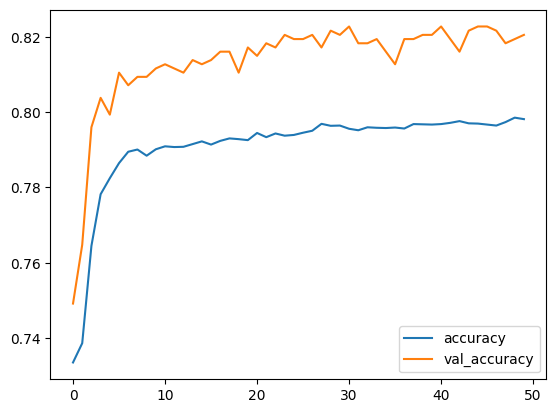

In [137]:
#Plot between Accuracy and Val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

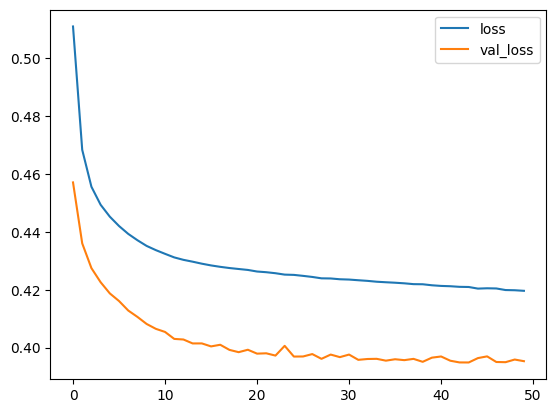

In [138]:
# Plot between 
history_seq_df[['loss', 'val_loss']].plot()

In [139]:
#model Evaluation

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print (classification_report(y_test, y_pred_seq))

33/33 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       769
           1       0.66      0.52      0.58       286

    accuracy                           0.80      1055
   macro avg       0.75      0.71      0.72      1055
weighted avg       0.79      0.80      0.79      1055



2022-12-02 07:27:33.212970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


berdasarkan accuracy model diperoleh 80%, artinya memprediksi benar 80%. untuk nilai precision untuk customer yang 'Churn', 66% berhasil memprediksi customer yang akan churn dengan benar, sedangkan sisanya 34% salah prediksi. 
nilai recall, 52% berhasil memprediksi customer yang akan churn dengan benar, sedangkan sisanya 48% salah prediksi. 

perbedaan loss dari training set dan validasi set kebanyakan sekitar 0.2 pada setiap epochs, loss dari training set cenderung menurun hingga 0.41 seiring bertambahnya epochs. 
berdasarkan kurva terlihat bahwa model mengalami sedikit overfitting.

# 7- Functional API 

## Model Definition

Pada functional APU, neural networks ini terdiri dari 2 hidden layer yang terdiri dari 24 neuron dan 12 neuron, kemudian input layer akan digabungkan dengan hidden layer terakhir, dan 1 output layer yang memiliki fungsi aktivasi sigmoid. selanjutnya, menggunakan 'binary_crossentropy' karena output yang diharapkan adalah biner. 

In [108]:
#Create Functional Model
input_layer = Input (shape=(13,))
hidden1_layer = Dense(24, activation='relu')(input_layer)
hidden2_layer = Dense (12, activation='relu')(hidden1_layer)
output_layer = Dense(1, activation='sigmoid')(hidden2_layer)

concat_layer = concatenate ([input_layer, hidden2_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

#Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='SGD',
                         metrics=['accuracy'])

model_functional.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 dense_28 (Dense)               (None, 24)           336         ['input_8[0][0]']                
                                                                                                  
 dense_29 (Dense)               (None, 12)           300         ['dense_28[0][0]']               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 25)           0           ['input_8[0][0]',                
                                                                  'dense_29[0][0]']         

## Model Training

In [109]:
#Train the Model Functional
history_func = model_functional.fit(train_pipe, epochs=50, validation_data=(X_val, y_val), batch_size=16 )

Epoch 1/50
 12/477 [..............................] - ETA: 2s - loss: 0.9949 - accuracy: 0.2656  

2022-12-02 07:04:49.804616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


474/477 [============================>.] - ETA: 0s - loss: 0.5723 - accuracy: 0.6879

2022-12-02 07:04:52.059763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


477/477 [==============================] - 3s 5ms/step - loss: 0.5717 - accuracy: 0.6884 - val_loss: 0.4694 - val_accuracy: 0.7402
Epoch 2/50
477/477 [==============================] - 2s 4ms/step - loss: 0.4752 - accuracy: 0.7453 - val_loss: 0.4377 - val_accuracy: 0.7670
Epoch 3/50
477/477 [==============================] - 2s 5ms/step - loss: 0.4572 - accuracy: 0.7653 - val_loss: 0.4264 - val_accuracy: 0.7793
Epoch 4/50
477/477 [==============================] - 2s 5ms/step - loss: 0.4500 - accuracy: 0.7751 - val_loss: 0.4222 - val_accuracy: 0.7971
Epoch 5/50
477/477 [==============================] - 2s 4ms/step - loss: 0.4459 - accuracy: 0.7794 - val_loss: 0.4176 - val_accuracy: 0.8038
Epoch 6/50
477/477 [==============================] - 2s 4ms/step - loss: 0.4431 - accuracy: 0.7834 - val_loss: 0.4156 - val_accuracy: 0.7982
Epoch 7/50
477/477 [==============================] - 2s 4ms/step - loss: 0.4410 - accuracy: 0.7850 - val_loss: 0.4133 - val_accuracy: 0.8060
Epoch 8/50
477/47

## Model Evaluation

In [110]:
# Create Dataframe
history_func_df= pd.DataFrame (history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.571688,0.688447,0.469442,0.740245
1,0.475169,0.745260,0.437738,0.767001
2,0.457234,0.765335,0.426409,0.779264
3,0.450032,0.775110,0.422202,0.797101
4,0.445908,0.779374,0.417643,0.803790
5,0.443109,0.783442,0.415583,0.798216
6,0.440958,0.784950,0.413311,0.806020
7,0.439162,0.787575,0.411688,0.807135
8,0.437462,0.787443,0.409840,0.808250
9,0.435940,0.789346,0.407718,0.809365


<AxesSubplot: >

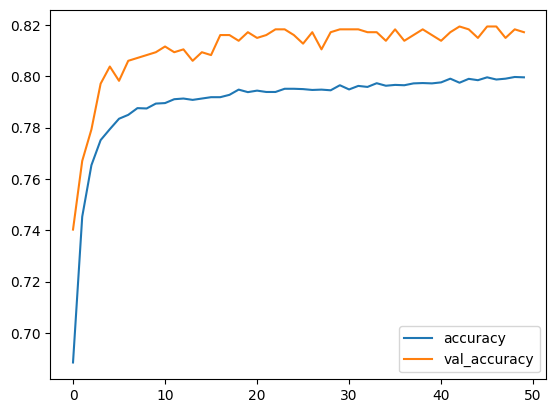

In [111]:
#Plot between Accuracy and Val_accuracy

history_func_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

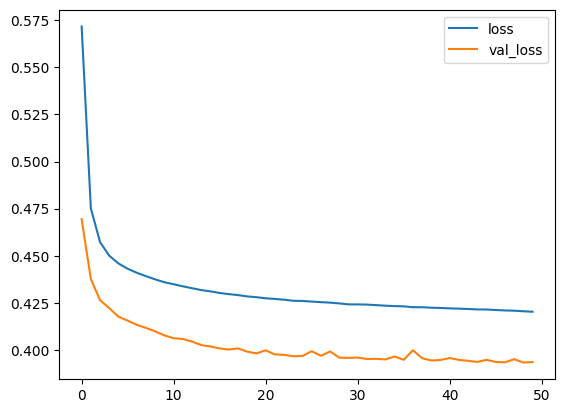

In [112]:
# Plot between 
history_func_df[['loss', 'val_loss']].plot()

In [113]:
#model Evaluation

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print (classification_report(y_test, y_pred_func))

33/33 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       769
           1       0.67      0.50      0.57       286

    accuracy                           0.80      1055
   macro avg       0.75      0.71      0.72      1055
weighted avg       0.79      0.80      0.79      1055



2022-12-02 07:06:46.184108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


hasil menunjukkan bahwa model memiliki akurasi 80%, artinya mampu memprediksi benar sebesar 80%. recall 50% artinya, tingkat keberhasilan model dalam menemukan kembali suatu informasi dengan memprediksi benar sebesar 50%. 
Berdasarkan precision, 67% berhasil memprediksi customer yang churn dengan benar, sedangkan sisanya 33% salah prediksi. 

perbedaan loss dari train set dan validation set kebanyakan sekitar 0.2 pada setiap epochs, sedangkan loss dari train set cenderung menurun hingga 0.42 seiring bertambahnya epochs. loss dari validation set cenderung menurun juga hingga 0.39 seiring bertambahnya epochs. 
dari kurva model Functional API mengalami sedikit overfitting. 

# 8- Improve Model Sequential API 

## Model Definition

Menggunakan dropout karena dapat mengurangi masalah varians atau masalah overfitting. secara acak melewati dan melepaskan node. 

In [141]:
#Create Sequential API
model_seq_improve = Sequential()
model_seq_improve.add(Dense(24, activation='relu', input_shape=(13,))) #Hidden layer 1
model_seq_improve.add(Dropout(rate=0.2))
model_seq_improve.add(Dense(12, activation='relu')) #Hidden layer 2
model_seq_improve.add(Dropout(rate=0.2))
model_seq_improve.add(Dense(1, activation='sigmoid')) #Output layer


#Compile
model_seq_improve.compile(loss='binary_crossentropy',
                         optimizer='SGD',
                         metrics=['accuracy'])

model_seq_improve.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 24)                336       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_51 (Dense)            (None, 12)                300       
                                                                 
 dropout_3 (Dropout)         (None, 12)                0         
                                                                 
 dense_52 (Dense)            (None, 1)                 13        
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [142]:
#Train the Model Sequential
history_seq_improve = model_seq_improve.fit(train_pipe, epochs=50, validation_data=(X_val, y_val), batch_size=16 )

Epoch 1/50
  1/477 [..............................] - ETA: 3:13 - loss: 0.7625 - accuracy: 0.5312

2022-12-02 07:29:02.817941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/477 [============================>.] - ETA: 0s - loss: 0.5977 - accuracy: 0.6859

2022-12-02 07:29:05.360305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


477/477 [==============================] - 3s 5ms/step - loss: 0.5964 - accuracy: 0.6871 - val_loss: 0.4830 - val_accuracy: 0.7492
Epoch 2/50
477/477 [==============================] - 2s 5ms/step - loss: 0.5083 - accuracy: 0.7342 - val_loss: 0.4474 - val_accuracy: 0.7637
Epoch 3/50
477/477 [==============================] - 2s 5ms/step - loss: 0.4846 - accuracy: 0.7395 - val_loss: 0.4371 - val_accuracy: 0.7681
Epoch 4/50
477/477 [==============================] - 2s 5ms/step - loss: 0.4751 - accuracy: 0.7451 - val_loss: 0.4310 - val_accuracy: 0.7715
Epoch 5/50
477/477 [==============================] - 2s 5ms/step - loss: 0.4695 - accuracy: 0.7490 - val_loss: 0.4284 - val_accuracy: 0.7826
Epoch 6/50
477/477 [==============================] - 2s 5ms/step - loss: 0.4654 - accuracy: 0.7540 - val_loss: 0.4265 - val_accuracy: 0.7904
Epoch 7/50
477/477 [==============================] - 2s 5ms/step - loss: 0.4623 - accuracy: 0.7590 - val_loss: 0.4246 - val_accuracy: 0.7949
Epoch 8/50
477/47

## Model Evaluation

In [143]:
# Create Dataframe
history_seq_improve_df= pd.DataFrame (history_seq_improve.history)
history_seq_improve_df

,loss,accuracy,val_loss,val_accuracy
0,0.596400,0.687069,0.483011,0.749164
1,0.508317,0.734173,0.447373,0.763657
2,0.484580,0.739487,0.437101,0.768116
3,0.475076,0.745129,0.430987,0.771460
4,0.469516,0.749000,0.428402,0.782609
5,0.465433,0.753985,0.426483,0.790412
6,0.462271,0.758971,0.424614,0.794872
7,0.459771,0.761071,0.422370,0.800446
8,0.457641,0.763236,0.422004,0.802676
9,0.455787,0.764351,0.419241,0.802676


<AxesSubplot: >

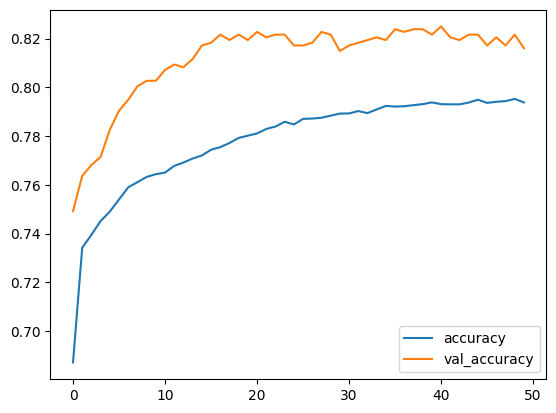

In [144]:
#Plot between Accuracy and Val_accuracy

history_seq_improve_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

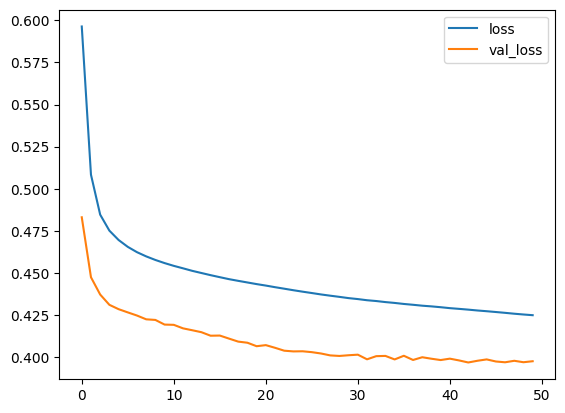

In [145]:
# Plot between 
history_seq_improve_df[['loss', 'val_loss']].plot()

In [146]:
#model Evaluation

y_pred_seq_improve = model_seq_improve.predict(X_test)
y_pred_seq_improve = np.where(y_pred_seq_improve >= 0.5, 1, 0)

print (classification_report(y_test, y_pred_seq_improve))

33/33 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       769
           1       0.68      0.59      0.63       286

    accuracy                           0.81      1055
   macro avg       0.77      0.74      0.75      1055
weighted avg       0.81      0.81      0.81      1055



2022-12-02 07:31:06.698178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


terjadi peningkatan dari nilai precision, recall, f1score, dan accuracy dari nilai sebelumnya. yang awalnya precision 66%, recall 52%, f1score 58% dan akurasi 80% menjadi precision 68%, recall 59%, f1score 63%, dan accuracy 81%. ini merupakan sebuah peningkatan. 
dari kurva yang dihasilkan pun masih mengalami sedikit overfitting.

perbedaan loss dari training set dan validasi set kebanyakan sekitar 0.3 pada setiap epochs, loss dari training set cenderung menurun hingga 0.42 seiring bertambahnya epochs. 
berdasarkan kurva terlihat bahwa model mengalami sedikit overfitting.

Hal ini dapat berhasil karena node tidak setara dalam kekuatan penjelasnya dalam training set. 
jaringan saraf megoptimalkan dirinya sendiri dengan memberikan bobot yang sangat tinggi pada node ini. 
ketika menjalankan dropout, secara acak mematikan beberapa node, dan dalam beberapa kasus akan menjatuhkan node dan memaksa model untuk berlatih seolah-olah tidak ada. ketika node dijatuhkan, semua koneksinya dimatikan. ini menambahkan noise multiplikatif ke jaringan saraf karena akan dikalikan dengan 1 atau 0 (aktif atau non aktif).

# 9- Improve Model Functional API

## Model Definition

menggunakan learning rate karena dapat menghitung nilai koreksi bobot pada waktu proses training. 

In [161]:
#Create Functional Model
input_layer = Input (shape=(13,))
hidden1_layer = Dense(24, activation='relu')(input_layer)
hidden2_layer = Dense (12, activation='relu')(hidden1_layer)
output_layer = Dense(1, activation='sigmoid')(hidden2_layer)

concat_layer = concatenate ([input_layer, hidden2_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional_improve = Model(inputs=input_layer, outputs=output_layer)

#Compile
model_functional_improve.compile(loss='binary_crossentropy',
                         optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                         metrics=['accuracy'])

model_functional_improve.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 13)]         0           []                               
                                                                                                  
 dense_61 (Dense)               (None, 24)           336         ['input_15[0][0]']               
                                                                                                  
 dense_62 (Dense)               (None, 12)           300         ['dense_61[0][0]']               
                                                                                                  
 concatenate_7 (Concatenate)    (None, 25)           0           ['input_15[0][0]',               
                                                                  'dense_62[0][0]']        

## Model Training

In [162]:
#Train the Model Functional
history_func_improve = model_functional_improve.fit(train_pipe, epochs=50, validation_data=(X_val, y_val), batch_size=16 )

Epoch 1/50
  1/477 [..............................] - ETA: 2:44 - loss: 0.6227 - accuracy: 0.6562

2022-12-02 08:05:30.449452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


470/477 [============================>.] - ETA: 0s - loss: 0.5123 - accuracy: 0.7198

2022-12-02 08:05:32.830225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


477/477 [==============================] - 3s 5ms/step - loss: 0.5119 - accuracy: 0.7203 - val_loss: 0.4659 - val_accuracy: 0.7358
Epoch 2/50
477/477 [==============================] - 2s 5ms/step - loss: 0.4774 - accuracy: 0.7380 - val_loss: 0.4488 - val_accuracy: 0.7536
Epoch 3/50
477/477 [==============================] - 2s 5ms/step - loss: 0.4641 - accuracy: 0.7566 - val_loss: 0.4395 - val_accuracy: 0.7759
Epoch 4/50
477/477 [==============================] - 2s 5ms/step - loss: 0.4568 - accuracy: 0.7683 - val_loss: 0.4337 - val_accuracy: 0.7904
Epoch 5/50
477/477 [==============================] - 2s 4ms/step - loss: 0.4521 - accuracy: 0.7754 - val_loss: 0.4301 - val_accuracy: 0.7971
Epoch 6/50
477/477 [==============================] - 2s 4ms/step - loss: 0.4488 - accuracy: 0.7782 - val_loss: 0.4262 - val_accuracy: 0.8004
Epoch 7/50
477/477 [==============================] - 2s 5ms/step - loss: 0.4462 - accuracy: 0.7790 - val_loss: 0.4237 - val_accuracy: 0.7960
Epoch 8/50
477/47

## Model Evaluation

In [163]:
# Create Dataframe
history_func_improve_df= pd.DataFrame (history_func_improve.history)
history_func_improve_df

,loss,accuracy,val_loss,val_accuracy
0,0.511876,0.720331,0.465917,0.735786
1,0.477391,0.737978,0.448830,0.753623
2,0.464147,0.756610,0.439543,0.775920
3,0.456759,0.768287,0.433730,0.790412
4,0.452101,0.775372,0.430132,0.797101
5,0.448774,0.778193,0.426192,0.800446
6,0.446223,0.779046,0.423700,0.795987
7,0.444199,0.783114,0.421214,0.799331
8,0.442539,0.784491,0.419528,0.801561
9,0.440976,0.783966,0.417992,0.800446


<AxesSubplot: >

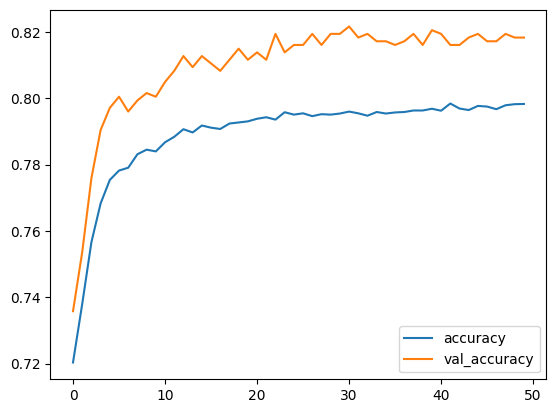

In [164]:
#Plot between Accuracy and Val_accuracy

history_func_improve_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

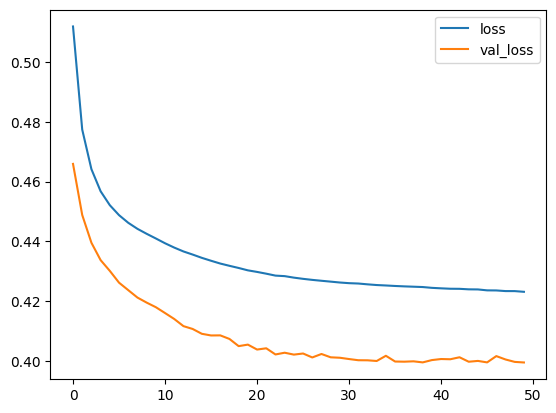

In [165]:
# Plot between loss and val loss
history_func_improve_df[['loss', 'val_loss']].plot()

In [166]:
#model Evaluation

y_pred_func_improve = model_functional_improve.predict(X_test)
y_pred_func_improve = np.where(y_pred_func_improve >= 0.5, 1, 0)

print (classification_report(y_test, y_pred_func_improve))

33/33 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       769
           1       0.67      0.52      0.58       286

    accuracy                           0.80      1055
   macro avg       0.75      0.71      0.73      1055
weighted avg       0.79      0.80      0.79      1055



2022-12-02 08:07:29.589191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


setelah training model improvement Functional API dengan parameter sebagai berikut:
2 hidden layer yang terdiri dari 24 dan 12
activation hidden layer menggunakan ReLu
optimizer dan learning_rate = SGD dengan lr=0.01

perbedaan loss dari training set dan validasi set kebanyakan sekitar 0.3 pada setiap epochs, loss dari training set cenderung menurun hingga 0.42 seiring bertambahnya epochs. 
berdasarkan kurva terlihat bahwa model mengalami sedikit overfitting.

Metric evaluasi accuracy masih terlihat sama dengan eksperimen sebelumnya, namun jika dilihat dari nilai recall dan f1 score nya naik dari sebelumnya. dari yang awalnya recall hanya 50% naik menjadi 52%. karena recall sendiri merupakan metric yang paling penting untuk bisnis karena menunjukkan seberapa baik model (seberapa kecil FN yang dimiliki model) dalam mendeteksi pelanggan yang akan melakukan Churn. sehingga, sangat penting memiliki nilai recall yang lebih tinggi. dari hasil ini, dapat prediksi dengan benar sekitar 52%. tentunya, akan menguntungkan bagi perusahaan karena dapat membuat strategi untuk mencegah pelanggan melakukan Churn. 

Dalam model improvement ini dapat menaikkan metric dari eksperimen sebelumnya, karena learning rate yang saya gunakan cenderung kecil, sehingga ketelitian jaringan akan semakin besar atau bertambah dengan konsekuensi proses training akan memakan waktu yang semakin lama. sehingga diperoleh hasil yang lebih baik. 

Dari keempat model yang sudah dibuat dan dianalisis, diperoleh model terbaik yaitu Model improvement dari Sequential API, sehingga model tersebut yang akan disave dan digunakan untuk melakukan prediksi dari data inference. 

# 10- Model Saving 

In [187]:
# Save Pipeline

with open('final_pipeline.pkl', 'wb') as file_1:
  joblib.dump(final_pipe, file_1)

In [188]:
model_seq_improve.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 24)                336       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_51 (Dense)            (None, 12)                300       
                                                                 
 dropout_3 (Dropout)         (None, 12)                0         
                                                                 
 dense_52 (Dense)            (None, 1)                 13        
                                                                 
Total params: 649
Trainable params: 0
Non-trainable params: 649
_________________________________________________________________


In [189]:
#freeze model

#freeze model

model_seq_improve.trainable = False
model_seq_improve.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 24)                336       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_51 (Dense)            (None, 12)                300       
                                                                 
 dropout_3 (Dropout)         (None, 12)                0         
                                                                 
 dense_52 (Dense)            (None, 1)                 13        
                                                                 
Total params: 649
Trainable params: 0
Non-trainable params: 649
_________________________________________________________________


In [190]:
# Save ANN Model

model_seq_improve.save('telco_model.h5')

# 11 - Model Inference

In [191]:
# Load The Models

with open('final_pipeline.pkl', 'rb') as file_1:
  model_pipeline = joblib.load(file_1)

model_ann = load_model('telco_model.h5')

In [192]:
# Transform Inference-Set 

data_inf_transform = model_pipeline.transform(data_inf)
data_inf_transform

array([[0.        , 1.        , 0.16901408, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.88208955,
        0.15525707, 1.        , 0.        ],
       [0.        , 0.        , 0.87323944, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.86119403,
        0.75910893, 1.        , 2.        ],
       [1.        , 0.        , 0.21126761, 1.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.66368159,
        0.15686682, 1.        , 0.        ],
       [1.        , 0.        , 0.11267606, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01890547,
        0.02530594, 2.        , 0.        ],
       [1.        , 0.        , 0.04225352, 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.51542289,
        0.02862352, 1.        , 0.        ],
       [1.        , 0.        , 0.63380282, 1.        , 1.        ,
        1.        , 0.     

In [193]:
# Predict using Neural Network

y_pred_inf = model_ann.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

2022-12-02 14:09:04.534351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 271ms/step


array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [194]:
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Predictions'])

In [195]:
final_inf = pd.concat([data_inf['Churn'], y_pred_inf_df], axis=1)
final_inf.head(10)

,Churn,Predictions
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


# 12 - Kesimpulan 

Kesimpulan yang dapat ditarik dari hasil EDA dan pemodelan dengan adanya 4 model ANN yang berbeda adalah:

Customer Churn adalah kehilangan pelanggan dari suatu bisnis. Churn sendiri dihitung dari berapa banyak pelanggan meninggalkan bisnis Telco dalam waktu tertentu. jika variabel target 'Churn', maka pelanggan sudah tidak lagi berlangganan layanan perusahaan Telco.
Customer Churn penting untuk diketahui bisnis karena merupakan gambaran kesuksesan suatu bisnis dalam mempertahankan pelanggan. Jumlah pelanggan yang bertahan lebih banyak daripada pelanggan yang pergi dari Telco. Pelanggan yang melakukan 'Churn' sekitar 26.5%. Selanjutnya, pelanggan lebih suka melakukan pembayaran dengan menggunakan metode Elektronic check, kemudian yang paling jarang digunakan adalah metode credit card(automatic). Karena tidak semua orang memiliki kartu kredit, dan apabila menggunakan kartu kredit untuk membayar saluran telepon justru lebih mahal, karena harga cenderung rendah atau bukan barang/jasa yang dalam kategori mahal.Berdasarkan gender, pelanggan yang pergi lebih banyak perempuan, dan pelanggan yang bertahan lebih banyak laki-laki. Selanjutnya, pelanggan yang merupakan warga senior, lebih sedikit pelanggan yang pergi atau yang melakukan 'Churn'. Pelanggan yang memiliki pasangan, lebih cenderung bertahan daripada yang tidak memiliki pasangan.Jumlah pelanggan yang memiliki tanggungan lebih sedikit daripada yang tidak memiliki tanggungan, kemudian pelanggan yang pergi lebih banyak dari pelanggan yang tidak memiliki tanggungan. Pelanggan mayoritas memiliki layanan telepon, dan kemungkinan pelanggan yang pergi lebih banyak yang memiliki layanan telepon. Pelanggan yang memiliki banyak saluran lebih sedikit daripada pelanggan yang tidak memiliki banyak saluran, namun masih ada yang tidak memiliki layanan telepon. pelanggan yang pergi lebih banyak dari pelanggan yang memiliki banyak saluran. Terakhir, Tenure yang dimiliki pelanggan yang bertahan lebih banyak daripada tenure yang dimiliki pelanggan yang pergi atau yang melakukan Churn.

setelah dilakukan EDA, melakukan features selection dengan menggunakan headmap, dengan menghitung korelasi pada setiap kolom sehingga diperoleh 13 features untuk digunakan pemodelan ANN. Berdasarkan sequential API baseline diperoleh accuracy 80%, precision value 66%, recall value 52%, dan f1score 58%. sedangkan, functional API baseline diperoleh accuracy 80%, precision value 67%, recall value 50%, dan f1 score 57%. dimana lebih tinggi sequential API daripada functional API.

kemudian dilakukan improve model untuk kedua model, pada model sequential API menggunakan dropout 0.2 dan optimizer 'SGD', diperoleh accuracy yang meningkat menjadi 81%, precision value meningkat menjadi 68%, recall value menjadi 59%, dan f1 score menjadi 63%. hal ini berarti terjadi peningkatan nilai metriks. Hal ini dapat berhasil karena node tidak setara dalam kekuatan penjelasnya dalam training set. jaringan saraf megoptimalkan dirinya sendiri dengan memberikan bobot yang sangat tinggi pada node ini. 
ketika menjalankan dropout, secara acak mematikan beberapa node, dan dalam beberapa kasus akan menjatuhkan node dan memaksa model untuk berlatih seolah-olah tidak ada. ketika node dijatuhkan, semua koneksinya dimatikan. ini menambahkan noise multiplikatif ke jaringan saraf karena akan dikalikan dengan 1 atau 0 (aktif atau non aktif).

pada model functional API menggunakan optimizer dan learning_rate = SGD dengan lr=0.01, diperoleh accuracy dan precision value yang sama, namun untuk recall value naik menjadi 52% dam f1 score menjadi 58%. ini mengindikasikan adanya peningkatan nilai metriks. karena recall sendiri merupakan metric yang paling penting untuk bisnis karena menunjukkan seberapa baik model (seberapa kecil FN yang dimiliki model) dalam mendeteksi pelanggan yang akan melakukan Churn. sehingga, sangat penting memiliki nilai recall yang lebih tinggi. dari hasil ini, dapat prediksi dengan benar sekitar 52%. tentunya, akan menguntungkan bagi perusahaan karena dapat membuat strategi untuk mencegah pelanggan melakukan Churn. Dalam model improvement ini dapat menaikkan metric dari eksperimen sebelumnya, karena learning rate yang saya gunakan cenderung kecil, sehingga ketelitian jaringan akan semakin besar atau bertambah dengan konsekuensi proses training akan memakan waktu yang semakin lama. 

Berdasarkan keempat model yang ada, model yang memiliki nilai metriks paling bagus adalah model improvement dari Sequential API maka, model Sequential API akan digunakan untuk melakukan prediksi dari data inference. dari hasil prediksi menggunakan model sequential API improvement mampu memprediksi benar 100%. 

### Rekemendasi
untuk analisa lebih lanjut, kita dapat memaksimalkan model dengan optimizer lebih tepat, misalnya Adamax karena Adamax memperluas ke infinite norm(maks) dari gradien sebelumnya, biasanya Adamax lebih unggul dari Adam. Dapat juga menggunakan gradient clipping untuk improve model. 

terkait bisnis Telco, dapat menawarkan diskon untuk pelanggan sehingga pelanggan tidak merasa terbebani dengan biaya yang dikeluarkan untuk layanan telepon Telco. selain itu, dapat membuat bundling khusus untuk pelanggan yang tidak memiliki pasangan atau tanggungan, misalnya menawarkan harga spesial apabila menambahkan streaming dalam paketnya. 